In [2]:
# To mount the drive in colab
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Import Liberaries

In [3]:
import pandas as pd
import numpy as np

# Loading Datasets

In [4]:
# Load and print trianing data
train_df = pd.read_csv('/content/drive/MyDrive/Seniors.csv')
train_df.head(5)

,Unnamed: 0,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
0,0,209.762701,8.050855,1688.769167,44522.217074,9.229576e+06,99.999971
1,1,243.037873,15.812068,3842.931469,63020.764997,1.435537e+07,99.985703
2,2,220.552675,7.843130,1729.823314,49125.950249,1.072839e+07,99.999758
3,3,208.976637,23.786089,4970.736918,57128.881547,9.125702e+06,99.999975
4,4,184.730960,15.797812,2918.345014,38068.201283,6.303792e+06,100.000000


In [5]:
# Load and print testing data
test_df = pd.read_csv('/content/drive/MyDrive/Juniors.csv')
test_df.head(5)

,Unnamed: 0.1,Unnamed: 0,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric
0,0,2500,270.264688,11.023763,2979.333789,74382.645868,1.974082e+07
1,1,2501,147.113440,24.851899,3656.048303,36991.316027,3.183265e+06
2,2,2502,251.636694,19.861983,4998.003812,71156.545998,1.593350e+07
3,3,2503,226.765023,23.301227,5283.903266,64073.710961,1.166025e+07
4,4,2504,291.025207,16.896895,4917.422268,89519.819801,2.464829e+07


# Exploratory Data Analyss

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2500 non-null   int64  
 1   Temperature (°C)                2500 non-null   float64
 2   Pressure (kPa)                  2500 non-null   float64
 3   Temperature x Pressure          2500 non-null   float64
 4   Material Fusion Metric          2500 non-null   float64
 5   Material Transformation Metric  2500 non-null   float64
 6   Quality Rating                  2500 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 136.8 KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0.1                    1457 non-null   int64  
 1   Unnamed: 0                      1457 non-null   int64  
 2   Temperature (°C)                1457 non-null   float64
 3   Pressure (kPa)                  1457 non-null   float64
 4   Temperature x Pressure          1457 non-null   float64
 5   Material Fusion Metric          1457 non-null   float64
 6   Material Transformation Metric  1457 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 79.8 KB


In [8]:
# To check nan values in train_df
train_df.isnull().sum()

,0
Unnamed: 0,0
Temperature (°C),0
Pressure (kPa),0
Temperature x Pressure,0
Material Fusion Metric,0
Material Transformation Metric,0
Quality Rating,0


In [9]:
# To check nan values in test_df
test_df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Temperature (°C),0
Pressure (kPa),0
Temperature x Pressure,0
Material Fusion Metric,0
Material Transformation Metric,0


In [10]:
# To cehck statics of train_df
train_df.describe()

,Unnamed: 0,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
count,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000
mean,1249.50000,200.653802,14.800937,2966.560892,48385.166770,1.014740e+07,96.039307
std,721.83216,58.615971,5.704845,1461.402337,24053.925674,7.678297e+06,13.306205
min,0.00000,100.014740,5.009819,513.706875,10156.971955,9.999462e+05,1.421653
25%,624.75000,150.875184,9.821192,1800.528733,27504.622582,3.434285e+06,99.936589
50%,1249.50000,200.291585,14.864597,2708.227080,44809.454736,8.034823e+06,99.999996
75%,1874.25000,251.811806,19.722411,3929.471504,68156.553776,1.596700e+07,100.000000
max,2499.00000,299.961716,24.999132,7365.018714,103756.181544,2.698960e+07,100.000000


In [11]:
# To check the correlation of features of train_df
train_df.corr()

,Unnamed: 0,Temperature (°C),Pressure (kPa),Temperature x Pressure,Material Fusion Metric,Material Transformation Metric,Quality Rating
Unnamed: 0,1.000000,0.012284,0.013340,0.009842,0.013677,0.010192,0.003135
Temperature (°C),0.012284,1.000000,-0.009883,0.585975,0.975767,0.970969,-0.470129
Pressure (kPa),0.013340,-0.009883,1.000000,0.771878,0.160815,-0.009420,0.016942
Temperature x Pressure,0.009842,0.585975,0.771878,1.000000,0.703844,0.568807,-0.259878
Material Fusion Metric,0.013677,0.975767,0.160815,0.703844,1.000000,0.977445,-0.519979
Material Transformation Metric,0.010192,0.970969,-0.009420,0.568807,0.977445,1.000000,-0.585221
Quality Rating,0.003135,-0.470129,0.016942,-0.259878,-0.519979,-0.585221,1.000000


# Preprocessing

In [17]:
# To drop irrelevant columns
train_df = train_df.drop('Unnamed: 0', axis=1)
test_df = test_df.drop('Unnamed: 0.1', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

In [18]:
# To split the training data into training and validation
def train_val_split(train_df, val_ratio=0.2, random_seed=42):
    np.random.seed(random_seed)  # To reproducibility
    shuffle_indicies = np.random.permutation(len(train_df))  # To shuffle the data indices
    validation_size = int(len(train_df) * val_ratio)
    validation_indicies = shuffle_indicies[:validation_size]  # First part for validation
    train_indicies = shuffle_indicies[validation_size:]       # Remaining part for training
    return train_df.iloc[train_indicies], train_df.iloc[validation_indicies]

train_data, val_data = train_val_split(train_df, val_ratio=0.2)

In [19]:
# To Training
X_train = train_data.drop(columns=['Quality Rating']).values
y_train = train_data['Quality Rating'].values

# To validation
X_val = val_data.drop(columns=['Quality Rating']).values
y_val = val_data['Quality Rating'].values

In [20]:
# To check the shap of all data
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(2000, 5)
(2000,)
(500, 5)
(500,)


# Linear Regression model(scratch) training




In [21]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        # To initialize weights and bias
        num_samples, num_features = X_train.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # To store losses for later use in graph
        self.train_losses = []
        self.val_losses = []

        # Gradient Descent
        for epoch in range(1, self.n_iters + 1):
            # Predicted values for training set
            y_pred_train = np.dot(X_train, self.weights) + self.bias

            # To compute training loss (Mean Squared Error)
            train_loss = np.mean((y_train - y_pred_train) ** 2) # Cost function(mse) for training
            self.train_losses.append(train_loss)

            # To compute gradients
            dw = (1 / num_samples) * np.dot(X_train.T, (y_pred_train - y_train))
            db = (1 / num_samples) * np.sum(y_pred_train - y_train)

            # To update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Validation loss
            if X_val is not None and y_val is not None:
                y_pred_val = np.dot(X_val, self.weights) + self.bias
                val_loss = np.mean((y_val - y_pred_val) ** 2) # Cost function(mse) for validation
                self.val_losses.append(val_loss)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# To standardize data
def standardize_data(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

X_train = standardize_data(X_train)
X_val = standardize_data(X_val)
X_test = standardize_data(test_df.values)

# To train the model
model = LinearRegression(lr=0.01, n_iters=1000)
model.fit(X_train, y_train, X_val, y_val)

# To make predictions
predictions = model.predict(X_test)
print("Predictions:", predictions)

Predictions: [ 85.79718193 101.82484611  91.35291813 ...  93.01045507  98.10420562
 101.4638689 ]


# Cost Function Visualization

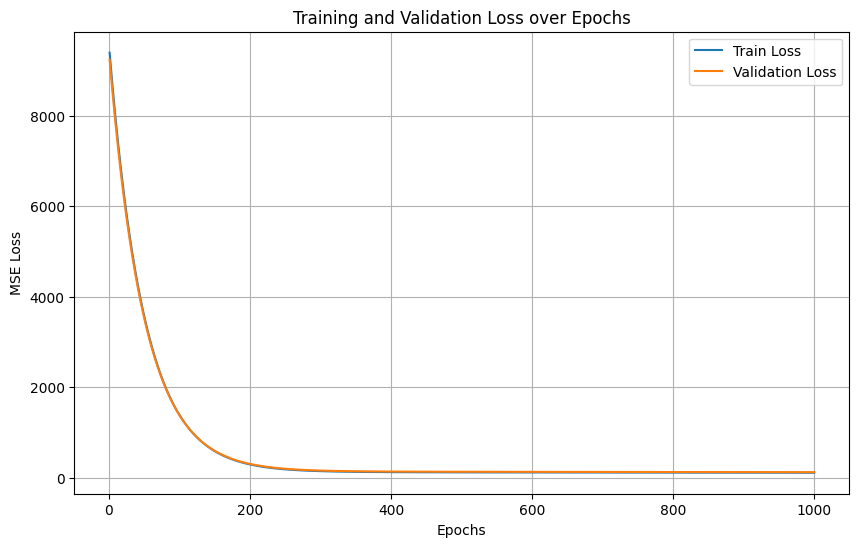

In [23]:
import matplotlib.pyplot as plt

# To plot the loss curves
def plot_loss(train_losses, val_losses, n_iters):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, n_iters + 1), train_losses, label="Train Loss")
    if val_losses:
        plt.plot(range(1, n_iters + 1), val_losses, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Training and Validation Loss over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

# To call the function to plot the losses
plot_loss(model.train_losses, model.val_losses, model.n_iters)